<a href="https://colab.research.google.com/github/yungtiga/Email-Spam-Detection-using-ML/blob/main/CMP7239.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the model used


=== Naive Bayes ===
Accuracy: 0.9668161434977578
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Saved Naive Bayes model to spam_model_naive_bayes.model

=== Logistic Regression ===
Accuracy: 0.9524663677130045
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Saved Logistic Regression model to spam_model_logistic_regression.model

=== Random Forest ===
Accuracy: 0.9775784753363229
Classifica

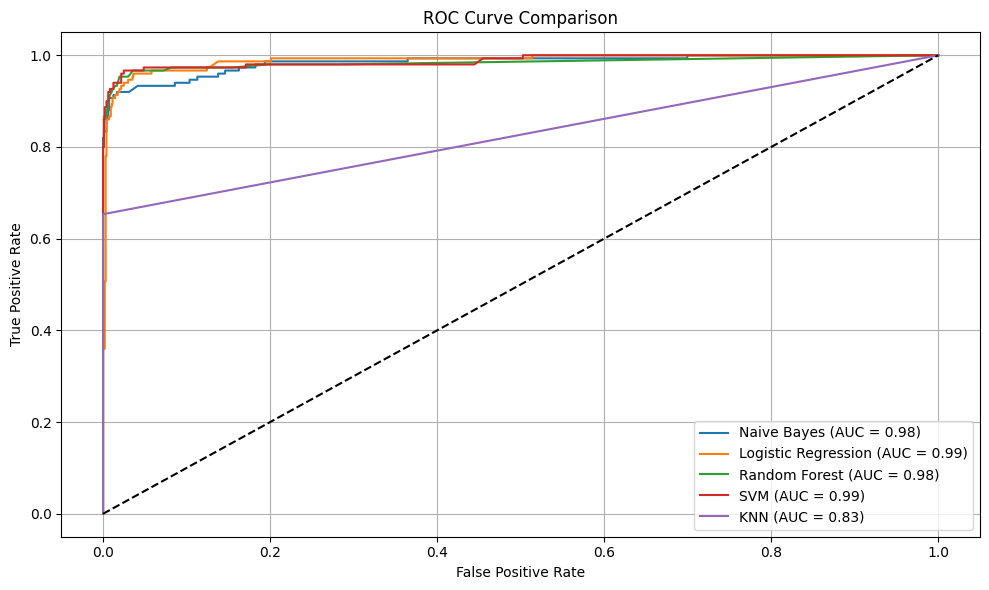

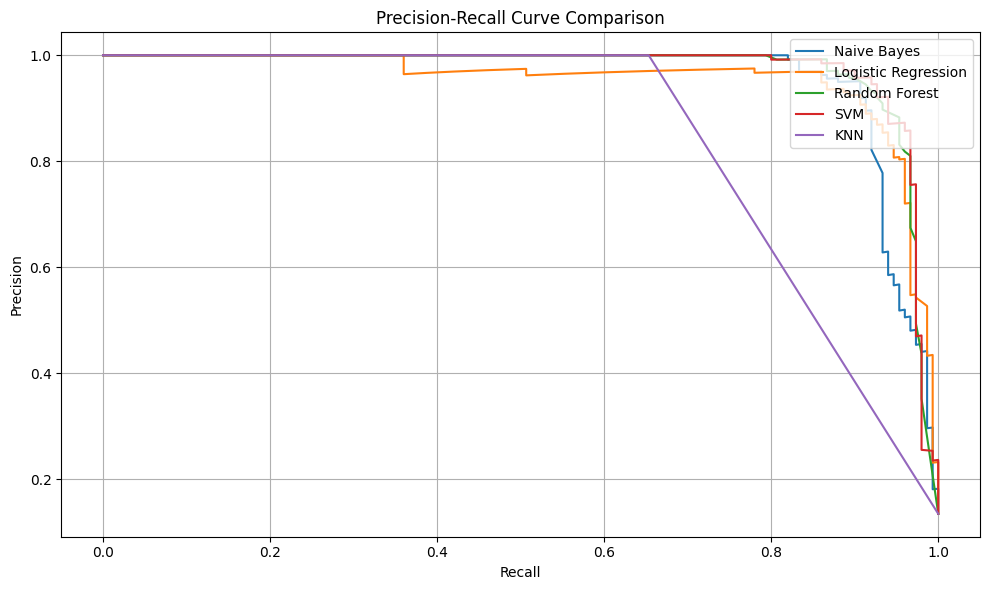


=== Model Comparison Table ===
                     Accuracy  Precision  Recall  F1-score
Naive Bayes             0.967      0.968   0.967     0.965
Logistic Regression     0.952      0.953   0.952     0.949
Random Forest           0.978      0.978   0.978     0.977
SVM                     0.977      0.977   0.977     0.976
KNN                     0.913      0.921   0.913     0.894


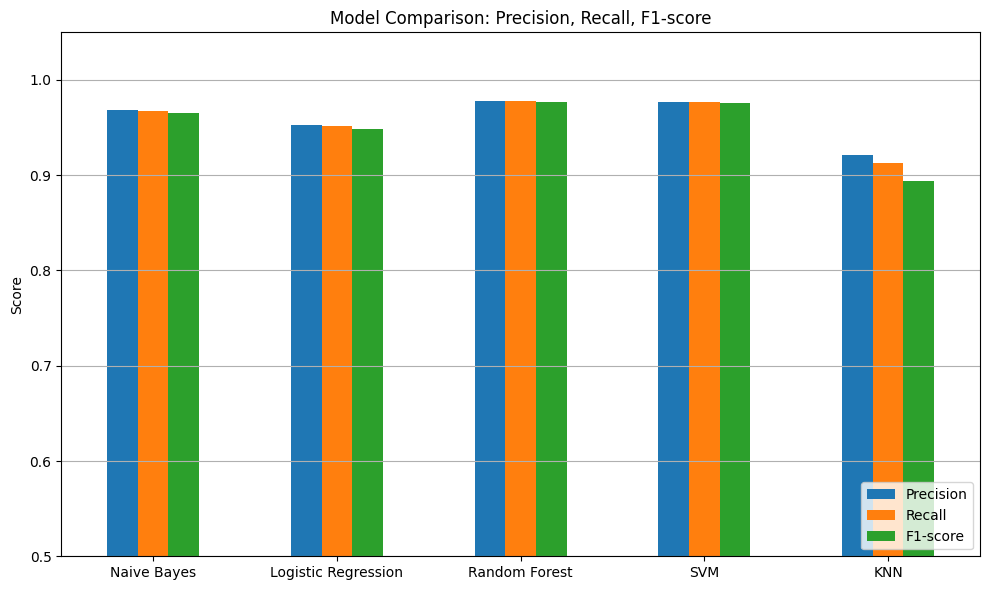

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_curve
import joblib

df = pd.read_csv("/content/spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

model_metrics = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    report = classification_report(y_test, preds, output_dict=True)

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

    model_metrics[name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }

    # Save the trained model (inside the loop)
    filename = f"spam_model_{name.replace(' ', '_').lower()}.model"
    joblib.dump(model, filename)
    print(f"Saved {name} model to {filename}")

# Save vectorizer once outside (assuming it's the same for all):
joblib.dump(vectorizer, "vectorizer.model")


plt.figure(figsize=(10, 6))
for name, model in models.items():
    probs = model.predict_proba(X_test_vec)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for name, model in models.items():
    probs = model.predict_proba(X_test_vec)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, probs)
    plt.plot(recall, precision, label=name)

plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(model_metrics).T.round(3)
print("\n=== Model Comparison Table ===")
print(metrics_df)

metrics_df[['Precision', 'Recall', 'F1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Precision, Recall, F1-score')
plt.ylabel('Score')
plt.ylim(0.5, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



=== Naive Bayes ===
Accuracy: 0.9668161434977578
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


=== Logistic Regression ===
Accuracy: 0.9524663677130045
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115


=== Random Forest ===
Accuracy: 0.9748878923766816
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
     

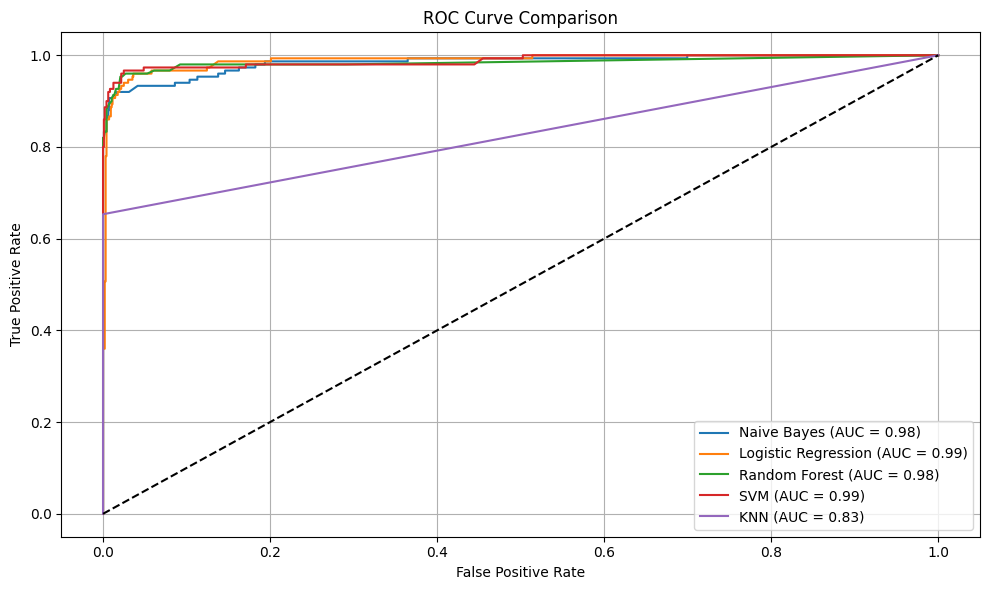

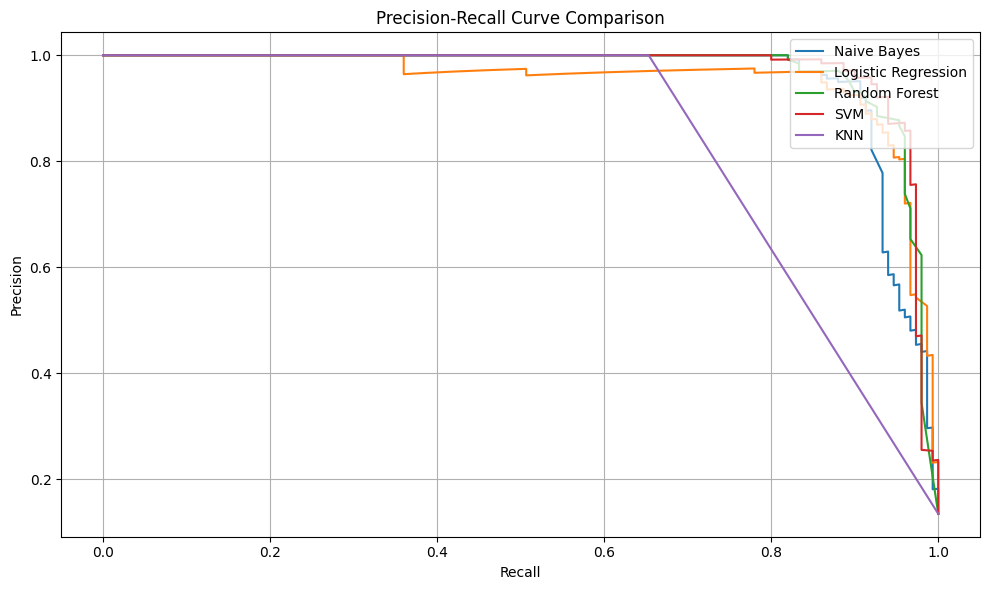


=== Model Comparison Table ===
                     Accuracy  Precision  Recall  F1-score
Naive Bayes             0.967      0.968   0.967     0.965
Logistic Regression     0.952      0.953   0.952     0.949
Random Forest           0.975      0.975   0.975     0.974
SVM                     0.977      0.977   0.977     0.976
KNN                     0.913      0.921   0.913     0.894


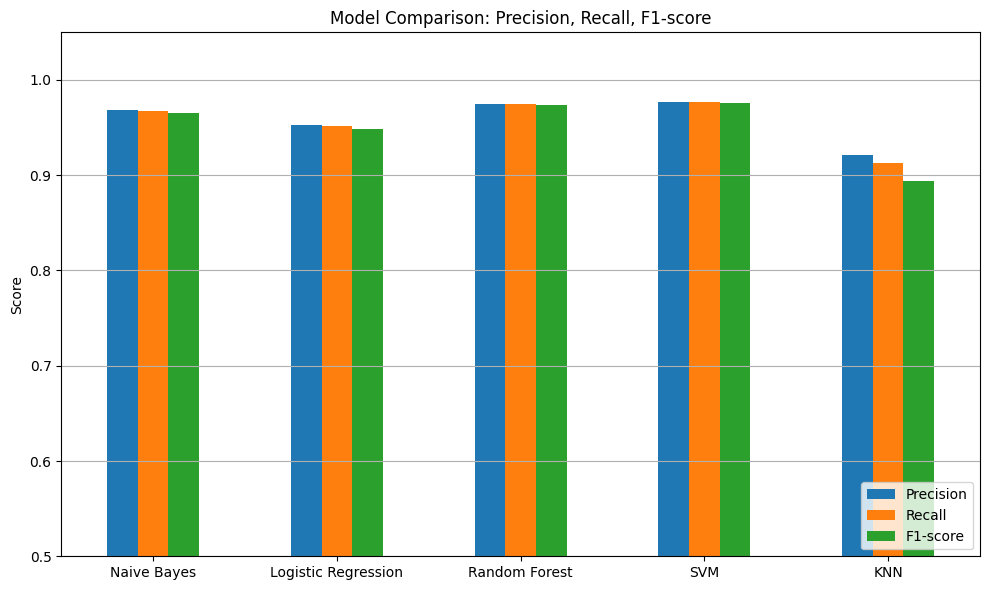

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_curve
import joblib

df = pd.read_csv("/content/spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

model_metrics = {}
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    report = classification_report(y_test, preds, output_dict=True)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

    model_metrics[name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }

joblib.dump(models['Naive Bayes'], "spam_model_naive_bayes.model")
joblib.dump(vectorizer, "vectorizer.model")

plt.figure(figsize=(10, 6))
for name, model in models.items():
    probs = model.predict_proba(X_test_vec)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for name, model in models.items():
    probs = model.predict_proba(X_test_vec)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, probs)
    plt.plot(recall, precision, label=name)

plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(model_metrics).T.round(3)
print("\n=== Model Comparison Table ===")
print(metrics_df)

metrics_df[['Precision', 'Recall', 'F1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Precision, Recall, F1-score')
plt.ylabel('Score')
plt.ylim(0.5, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
